In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
product_metrics = pd.read_csv('https://stepik.org/media/attachments/lesson/384453/conversion.csv')
.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено? 

Note: использовать идентификатор кампании в базе Х – xyz_campaign_id.

In [8]:
product_metrics.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

Посмотрите на данные и их описание. Соотнесите названия переменных с соответствующим типом данных.

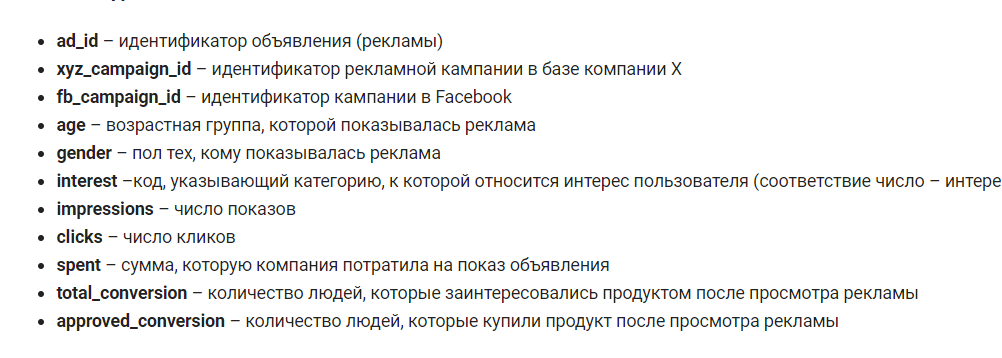

In [11]:
product_metrics.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:

Hint: np.log()
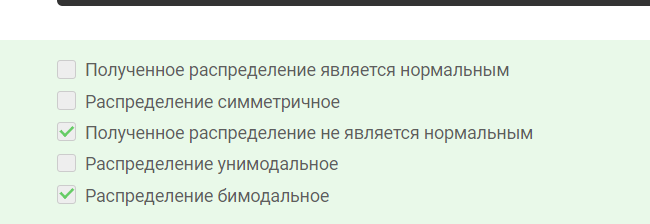


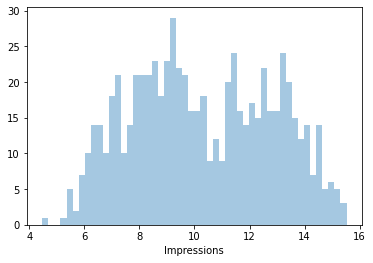

In [16]:
sns.distplot(np.log(.groupby('fb_campaign_id').Impressions.sum()), kde = False, bins = 50);

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.
CTR= impressions / clicks

Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [18]:
product_metrics['CTR'] = product_metrics.Clicks / product_metrics.Impressions

In [22]:
product_metrics.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

In [24]:
product_metrics.iloc[product_metrics.CTR.idxmax()]

ad_id                      738637
xyz_campaign_id               936
fb_campaign_id             109857
age                         45-49
gender                          F
interest                       24
Impressions                   944
Clicks                          1
Spent                        1.42
Total_Conversion                1
Approved_Conversion             0
CTR                    0.00105932
Name: 150, dtype: object

In [29]:
product_metrics.iloc[product_metrics.CTR.idxmax()]['ad_id']

738637

Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?

Note: параметр bins=20.
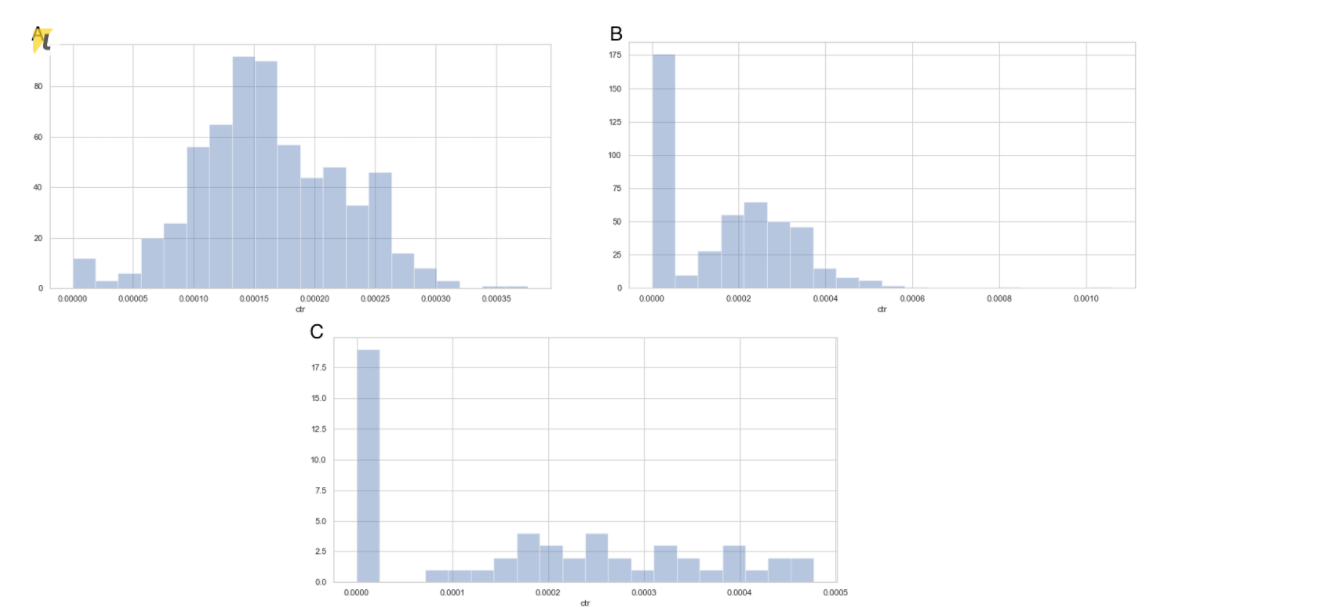


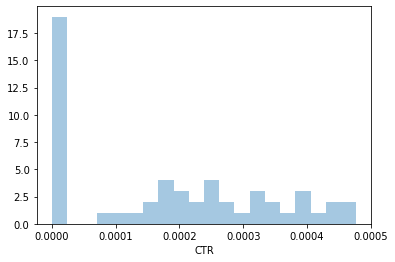

In [31]:
sns.distplot(product_metrics.query('xyz_campaign_id == 916').CTR, kde = False, bins = 20);

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:
CPC= spent / clicks
Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика – метод .dropna().

In [33]:
product_metrics['CPC'] = product_metrics.Spent / product_metrics.Clicks

In [34]:
product_metrics.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
dtype: float64

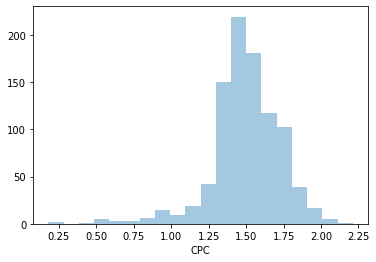

In [36]:
sns.distplot(product_metrics.dropna().CPC, kde = False, bins = 20);

In [37]:
import scipy.stats as ss

In [38]:
round(ss.iqr(product_metrics.CPC, nan_policy = 'omit'), 2)

0.25

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

Чтобы избежать появление ошибки, можно указать .dropna() при построении графика. Обратите внимание, что удалять NaN из самого датасета не нужно, только для визуализации. Картинка в полном размере – здесь.
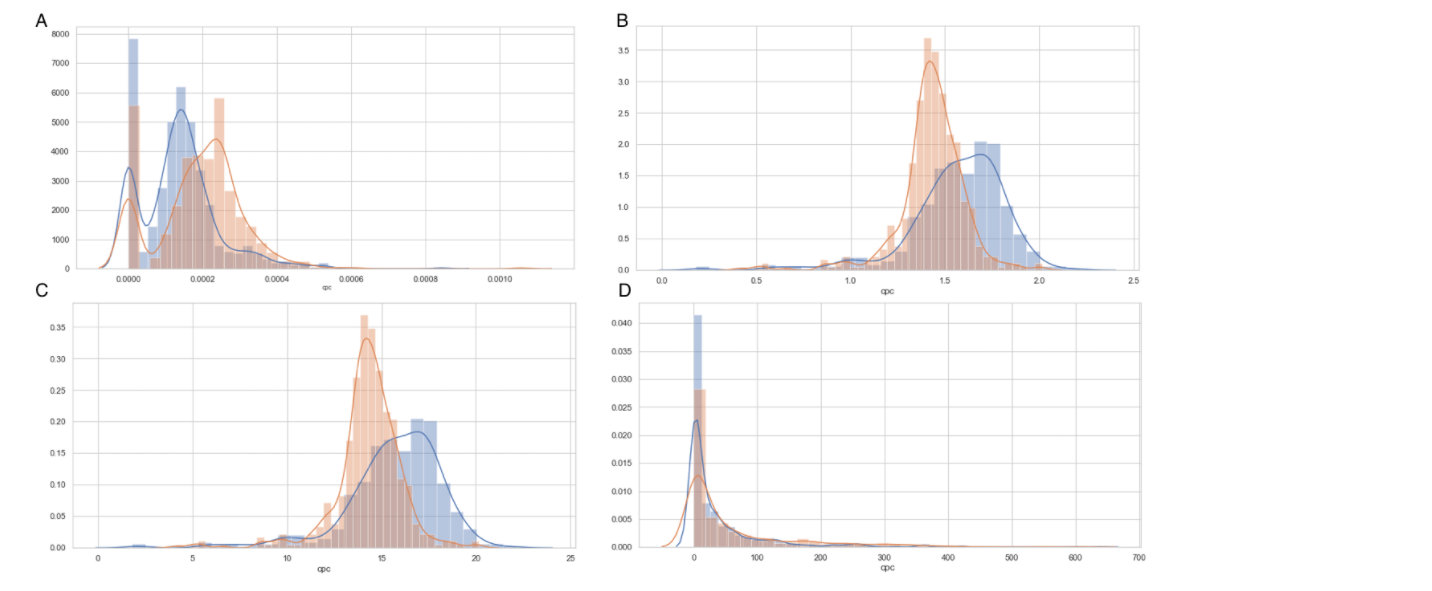

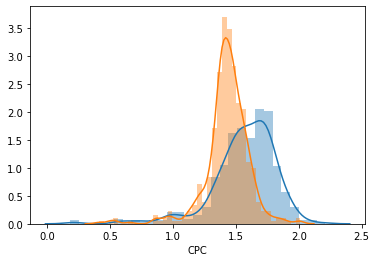

In [46]:
sns.distplot(product_metrics.query('gender == "M"').CPC.dropna())
sns.distplot(product_metrics.query('gender == "F"').CPC.dropna());        

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, то CRCR на данном этапе составляет 2/10 = 0.2 =20%

Note: клики – Clicks, покупки – Approved_Conversion.

In [47]:
product_metrics['conversion'] = ((product_metrics.Approved_Conversion / product_metrics.Clicks).mul(100))

In [48]:
round(product_metrics.query('ad_id == 1121814').conversion, 2)

860    3.09
Name: conversion, dtype: float64